<a href="https://colab.research.google.com/github/elateifsara/anajia_mvp1/blob/main/%5BMakersuite_Chat_Prompt%5D_Women_Health_Pre_Check.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PaLM API for Women Health Pre-Screening

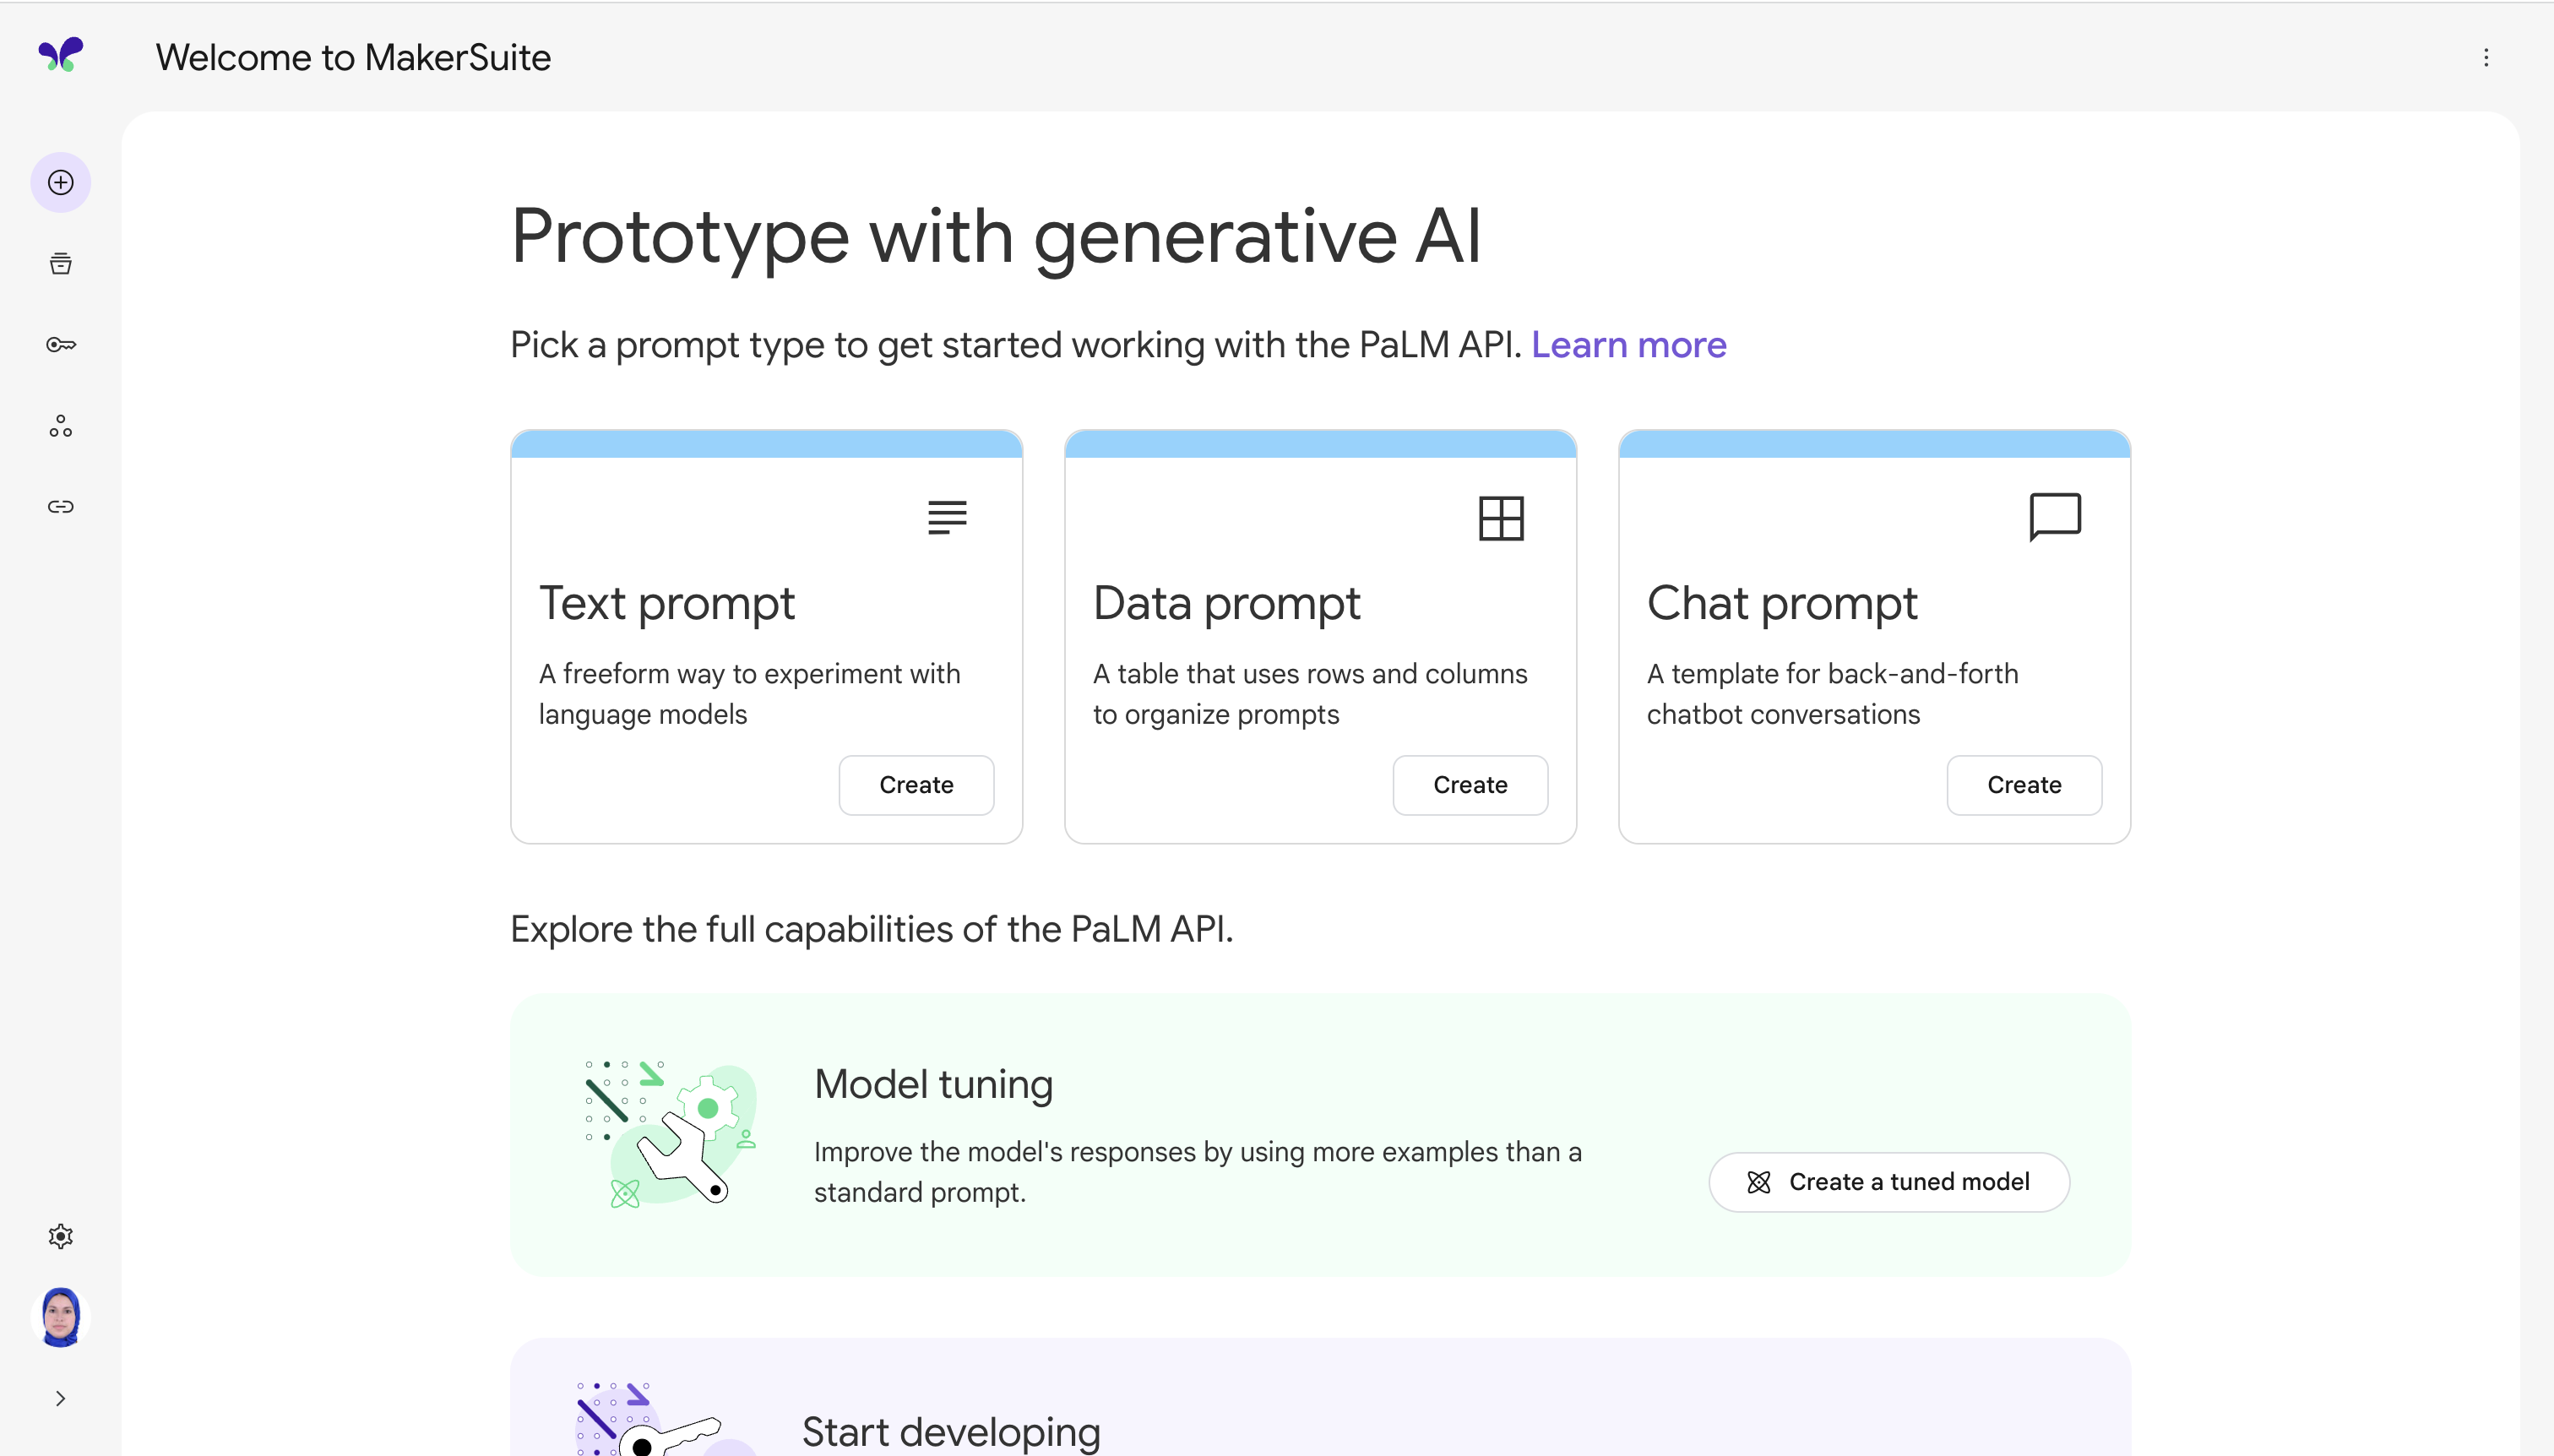

**Description of project**

The model is supposed to provide a series of questions and guidelines to help women perform pre-secreening for gynechological issues. The main format will be questions to collect ""symptoms"" (mostly feelings and observations from patient), and to provide appropriate resources for screenings that require physical interventions from well known medical references.
The goal is to automate pre-screening to help avoid medical complications that are too late to prevent because ""I thought it was just ..."".
The model will prompt the user to go see doctor in case some specific words that could mean warning are entered.

**TL;DR**

PaLM API can be used to help women identify health issues by answering their questions about symptoms. The goal is to encourage women to use this conversational model regularly to stay informed and seek care when needed.

**Tech stack**

Developped using:
- [Makersuite](https://makersuite.google.com/app/home) (Chat Prompt: for prototyping and testing conversational model)
- [Bard](https://bard.google.com/) (to refine context and provide helpful examples)
- Colab (to test the API in a python environment)

##### Copyright 2023 Google LLC

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
# Install the client library and import necessary modules.
!pip install google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.6/130.6 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.7/267.7 kB 8.1 MB/s eta 0:00:00


In [ ]:
import google.generativeai as palm
import base64
import json
import pprint

In [ ]:
# Configure the client library by providing your API key.
palm.configure(api_key=API_KEY)

In [ ]:
defaults = {
  'model': 'models/chat-bison-001',
  'temperature': 0.25,
  'candidate_count': 1,
  'top_k': 40,
  'top_p': 0.95,
}
context = "Goal: To provide a series of questions and guidelines to help women perform pre-screening for gynecological issues, guided by a seasoned gynecological doctor specialist, using simple layman terms and clear instructions, with visuals whenever possible, and referring to the latest research and highly credible and trustworthy websites for more information.\nAudience: Women of all ages.\n\nPurpose: To help women identify potential gynecological problems early on, so that they can seek appropriate medical care.\n\nContext: The user is interested in performing a pre-screening for gynecological issues, and is being guided by a seasoned gynecological doctor specialist.\n\nQuestions:\n- Please share your demographics (age, race and ethnicity, family history of any disease if applicable, and any lifestyle factors such as smoking, etc) with me, so that I can provide personalized suggestions.\n- Can you describe your symptoms? For example, \"I feel like I have a rock in my breast.\"\n- If you are feeling vague, please let me know, and I will ask further clarifying questions to help you.\n\nPrompts:\n- I am a seasoned gynecological doctor specialist, and I am here to help you keep track of your health and avoid future complications.\n- I will guide you through a series of questions and instructions, using simple layman terms and clear visuals.\n- If I encounter a use case that I don't understand, I will refer you to visit a doctor or provide resources you can read.\n- I will also provide simple, easy-to-follow suggestions to keep a healthy lifestyle for women of all ages.\n\nGuidelines:\n- Use simple layman terms and clear instructions, with visuals whenever possible.\n- Refer to the latest research and highly credible and trustworthy websites for more information.\n- Raise flags whenever you read alarming symptoms from the user.\n- Encourage the user to seek medical care if necessary.\n- Ask follow-up questions to clarify the user's symptoms and understanding of their health.\n- Process further information provided by the user in subsequent queries to provide more tailored guidance.\n\nProceed to ask the user more questions and provide guidance whenever more information is needed.\n\nProvide women with personalized, informative, and helpful pre-screening guidance, even if the user is vague or provides limited information in their initial query.\n\nAt the end of the conversation, summarize the key points and provide the user with resources to learn more from trustworthy and approved institutions.\n\nKeep conversations short and consistent.\nOnly provide further instructions or advice if requested."
examples = [
  [
    "Hello, I'm interested in doing a pre-screening for gynecological issues.",
    "Great! I can help you with that. Please share your demographics (age, race and ethnicity, family history of any disease if applicable, and any lifestyle factors such as smoking, etc) with me, so that I can provide personalized suggestions."
  ],
  [
    "I'm 35 years old, and I identify as female.",
    "Okay. Can you describe your symptoms? Like, what are you feeling? Where? Are any unusual stuff in your body?"
  ],
  [
    "I've been having some abnormal vaginal discharge, and it's been making me feel really uncomfortable.",
    "I see. Can you tell me more about the color, consistency, and odor of the discharge?"
  ],
  [
    "It's a thick, white discharge, and it has a fishy odor.",
    "Okay. Have you had any other symptoms, such as pain, itching, or burning?"
  ],
  [
    "No, just the discharge.",
    "I see. I'm glad you're being proactive about your health. I'm going to ask you a few more questions to get a better understanding of your situation."
  ]
]
messages = [
  "What are some common gynecological symptoms that women should be aware of?",
  "Here are some common gynecological symptoms that women should be aware of:\n\n* Abnormal vaginal discharge: This can be any change in the color, consistency, or odor of your vaginal discharge. It can be a sign of infection, sexually transmitted disease, or other health problems.\n* Painful intercourse: This can be caused by a number of things, including infection, dryness, or inflammation.\n* Irregular menstrual bleeding: This can be a sign of a number of things, including pregnancy, hormonal imbalance, or fibroids.\n* Pelvic pain: This can be caused by a number of things, including infection, endometriosis, or ovarian cysts.\n* Vaginal itching: This can be caused by a number of things, including infection, dryness, or allergies.\n* Vaginal burning: This can be caused by a number of things, including infection, dryness, or allergies.\n* Vaginal odor: This can be caused by a number of things, including infection, poor hygiene, or certain medications.\n\nIf you are experiencing any of these symptoms, it is important to see a doctor to get a diagnosis and treatment."
]
messages.append("NEXT REQUEST")
response = palm.chat(
  **defaults,
  context=context,
  examples=examples,
  messages=messages
)
print(response.last) # Response of the AI to your most recent request

Sure. What else can I help you with?


In [ ]:
messages.append("What is superficial endo")
response = palm.chat(
  **defaults,
  context=context,
  examples=examples,
  messages=messages
)
print(response.last) # Response of the AI to your most recent request

Superficial endometriosis is a type of endometriosis that occurs in the lining of the pelvis. It is the most common type of endometriosis, and it is often associated with pain and infertility.

Superficial endometriosis is caused by the growth of endometrial tissue outside of the uterus. This tissue can grow on the ovaries, fallopian tubes, bladder, bowel, and other organs in the pelvis.

The symptoms of superficial endometriosis can vary depending on the location of the endometrial tissue. However, common symptoms include:

* Painful periods
* Painful intercourse
* Painful bowel movements
* Infertility

There is no cure for superficial endometriosis, but there are treatments that can help to manage the symptoms. These treatments include:

* Pain medication
* Hormone therapy
* Surgery

If you are experiencing any of the symptoms of superficial endometriosis, it is important to see a doctor for diagnosis and treatment.


In [ ]:
!pip freeze > requirements.txt